In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airdata.csv')

In [3]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
df = df.drop(columns = ['survey_id', 'country', 'city', 'borough', 'bathrooms', 'minstay', 'last_modified'])

In [5]:
df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude,location
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,8685430,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,70191803,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [6]:
df.shape

(18723, 13)

In [7]:
neighborhoods = df.neighborhood.unique()
total_neighborhoods = len(neighborhoods)
total_neighborhoods

23

In [8]:
df.neighborhood.value_counts()

De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

<AxesSubplot:xlabel='price', ylabel='neighborhood'>

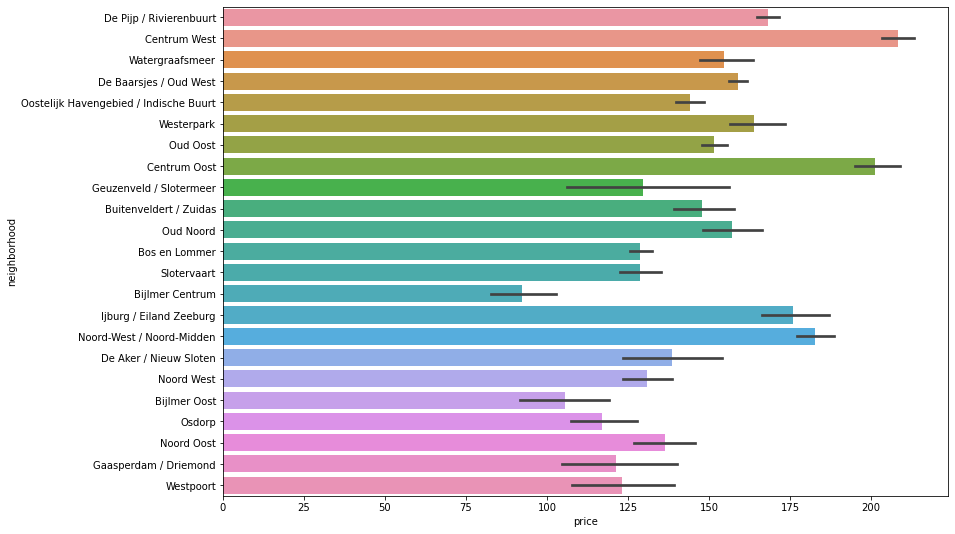

In [9]:
fig, ax = plt.subplots(figsize=(13, 9))
sns.barplot(data = df, y = "neighborhood", x = "price", ax = ax, orient = "h")

In [10]:
df.room_type.unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [11]:
df.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

In [18]:
group_by_neighborhood = df.groupby('neighborhood')

In [20]:
Centrum_west = group_by_neighborhood.get_group('Centrum West')

In [21]:
Centrum_west['reviews'].sum()

52115